# Microéconomie 5
## TD4 : Externalités

### Exercice 1 : La taxe pigovienne

Les dotations initiales sont $\omega^A = (10, 2)$ et $\omega^B = (2, 10)$. Les agents ont les préférences

\begin{aligned}
    U^A(x^A, x_1^B) &= \ln(1 + x_1^A) + x_2^A - \frac{\ln(1+x_1^B)}{2} \\
    U^B(x^B) &= \ln(1 + x_1^B) + x_2^B.
\end{aligned}
    
Le code suivant commence par définir ces données du problème.

**Dans le code ci-dessous, vous pouvez modifier librement les dotations $\omega^A$ et $\omega^B$ pour voir comment cela affecte les résultats.**

In [1]:
omegaA <- c(10, 2)                                       # dotation initiale de A
omegaB <- c(2, 10)                                       # dotation initiale de B
omega1 <- omegaA[1] + omegaB[1]                          # dotation totale en bien 1
omega2 <- omegaA[2] + omegaB[2]                          # dotation totale en bien 2
UA <- function(x1, x2, z1) log(1 + x1) + x2 - log(1 + z1)/2      # fonction d'utilité de A
UB <- function(x1, x2) log(1 + x1) + x2                  # fonction d'utilité de B

Clairement **$B$ exerce une externalité négative sur $A$** par sa consommation de bien 1. Le **dommage marginal** en terme de bien 2 est donné par

\begin{equation}
    \frac{ \frac{\partial U^A}{\partial x_1^B} }{ \frac{\partial U^A}{\partial x_2^A} } = \frac{ - \frac{1}{2(1 + x_1^B)} }{1} = - \frac{1}{2(1 + x_1^B)}.
\end{equation}

Plus $B$ consomme de bien 1, plus son dommage _marginal_ est faible.

Traçons les courbes d'indifférence (A en bleu, B en orange). Notons que **$A$ considère l'externalité comme donnée**.

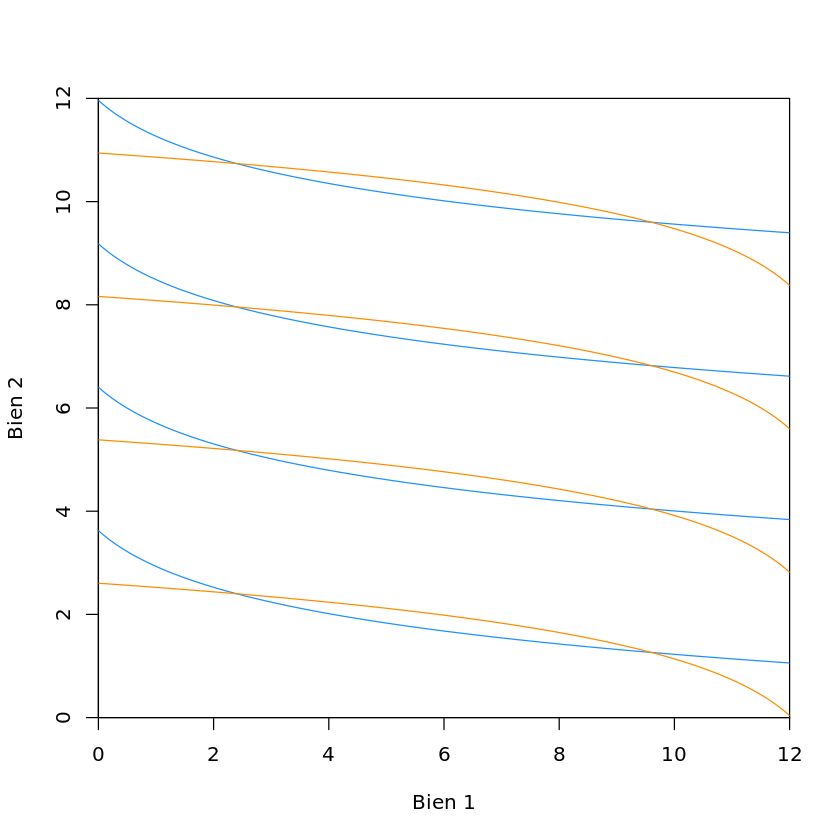

In [2]:
x1 <- seq(0, omega1, length=1000)

indiffA <- function(U) U - log(1 + x1)
indiffB <- function(U) U - log(1 + x1)

niveauxA <- seq(UA(omega1/5, omega2/5, 0), UA(4*omega1/5, 4*omega2/5, 0), len = 4)
niveauxB <- seq(UB(omega1/5, omega2/5), UB(4*omega1/5, 4*omega2/5), len = 4)

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs = "i", yaxs = "i")
for (U in niveauxA) lines(x1, indiffA(U), col = "dodgerblue", ylim = c(0, omega2))                # CI de A
for (U in niveauxB) lines(x1, rev(omega2 - indiffB(U)), col = "darkorange", ylim = c(0, omega2))  # CI de B

On cherche maintenant l'**équilibre concurrentiel** de cette économie. On traite ici **tous les cas** (même quand l'équilibre est en coin).


**1. Fonctions de demande**

Soit $p = (p_1, p_2)$ un vecteur de prix donné.

L'agent $A$ résout le programme

\begin{equation}
    \max_{x^A} \; U^A(x^A, x_1^B) \qquad \text{s.c.} \; p \cdot x^A \leq p \cdot \omega^A
\end{equation}

où $x_1^B$ est considéré fixe ($A$ ne considère pas qu'il peut affecter $x_1^B$ en changeant sa propre consommation $x_1^A$). Le lagrangien associé est

\begin{equation}
    \mathcal L(x^A, \mu) = \ln(1 + x_1^A) + x_2^A - \frac{\ln(1+x_1^B)}{2} + \mu(p \cdot \omega^A - p \cdot x^A)
\end{equation}

et les conditions du premier ordre
\begin{aligned}
    &\frac{1}{1 + x_1^A} - \mu p_1 = 0 \\
    &1 - \mu p_2 = 0 \\
    &p \cdot x^A = p \cdot \omega^A.
\end{aligned}

On en déduit
\begin{equation}
    \underbrace{\frac{1}{1 + x_1^A}}_{= \mathsf{TMS}^A} = \frac{p_1}{p_2} \iff x_1^A = \frac{p_2}{p_1} - 1
\end{equation}

qui est valide tant que $p_1 \leq p_2$. Si au contraire $p_1 > p_2$ on aura alors $x_1^A = 0$. La demande en bien 2 s'obtient ensuite avec x_2^A = \frac{p \cdot \omega^A - p_1 x_1^A}{p_2}.

Les demandes de $A$ sont donc 

\begin{equation}
    \boxed{ x_1^A(p) = \begin{cases}
        \frac{p_2}{p_1} - 1 &\text{si } p_1 \leq p_2 \\
        0 &\text{si } p_1 > p_2
        \end{cases} }
    \quad \text{et} \quad
    \boxed{ x_2^A(p) = \begin{cases}
        \frac{p_1}{p_2} (\omega_1^A + 1) + \omega_2^A - 1 &\text{si } p_2 \leq p_2 \\
        \frac{p_1}{p_2} \omega_1^A + \omega_2^A &\text{si } p_1 > p_2
        \end{cases} }.
\end{equation}


Pour $B$, on trouve les mêmes demandes (c'est normal puisque $A$ et $B$ ont les mêmes préférences si on ne tient pas compte de l'externalité) :

\begin{equation}
    \boxed{ x_1^B(p) = \begin{cases}
        \frac{p_2}{p_1} - 1 &\text{si } p_1 \leq p_2 \\
        0 &\text{si } p_1 > p_2
        \end{cases} }
    \quad \text{et} \quad
    \boxed{ x_2^B(p) = \begin{cases}
        \frac{p_1}{p_2} (\omega_1^B + 1) + \omega_2^B - 1 &\text{si } p_2 \leq p_2 \\
        \frac{p_1}{p_2} \omega_1^B + \omega_2^B &\text{si } p_1 > p_2
        \end{cases} }.
\end{equation}


**2. Équilibre du marché de bien 1**

À l'équilibre concurrentiel le marché du bien 1 doit être équilibré : $x_1^A(p) + x_1^B(p) = \omega_1$. Les demandes prennent des formes différentes selon les valeurs de $p_1$ et $p_2$, donc il faut distinguer les cas. 


**Cas 1.** Si $p_1 \leq p_2$, alors l'équilibre du marché du bien 1 s'écrit

\begin{equation}
    \frac{p_2}{p_1} - 1 + \frac{p_2}{p_1} - 1 = \omega_1 \iff \frac{p_1}{p_2} = \frac{1}{1 + \frac{\omega_1}{2}}.
\end{equation}

Ce rapport de prix constitue un équilibre tant qu'il est cohérent avec l'hypothèse du début du paragraphe, $p_1 \leq p_2$. Mais c'est bien le cas puisque le rapport de prix trouvé puisque

\begin{equation}
    \frac{p_1}{p_2} = \frac{1}{1 + \frac{\omega_1}{2}} \leq 1 \implies p_1 \leq p_2.
\end{equation}

Il y a donc bien un équilibre à ce rapport de prix.


**Cas 2.** Si $p_1 > p_2$, alors l'équilibre du marché du bien 1 s'écrit

\begin{equation}
    0 + 0 = \omega_1 \implies \text{impossible}
\end{equation}

donc il n'y a pas d'équilibre pour de tels prix.


En résumé, nous avons trouvé un équilibre (cas 1). Je réinjecte le rapport de prix dans les demandes pour obtenir les allocations d'équilibre :

\begin{equation}
    \boxed{
    \frac{p_1}{p_2} = \frac{1}{1 + \frac{\omega_1}{2}}
    \qquad
    x_1^A = \frac{\omega_1}{2}
    \qquad
    x_2^A = \frac{1 + \omega_1^A}{1 + \frac{\omega_1}{2}} + \omega_2^A - 1
    \qquad
    x_1^B = \frac{\omega_1}{2}
    \qquad
    x_2^B = \frac{1 + \omega_1^B}{1 + \frac{\omega_1}{2}} + \omega_2^B - 1
    }.
\end{equation}


L'application numérique donne

\begin{equation}
    \frac{p_1}{p_2} = \frac{1}{7}
    \qquad
    x_1^A = 6
    \qquad
    x_2^A = 2 + \frac{4}{7}
    \qquad
    x_1^B = 6
    \qquad
    x_2^B = 10 - \frac{4}{7}.
\end{equation}

Représentons cet équilibre dans la boîte d'Edgeworth. Je définis les fonctions de demande, l'allocation initiale, l'équilibre, puis enfin je trace les différentes courbes.

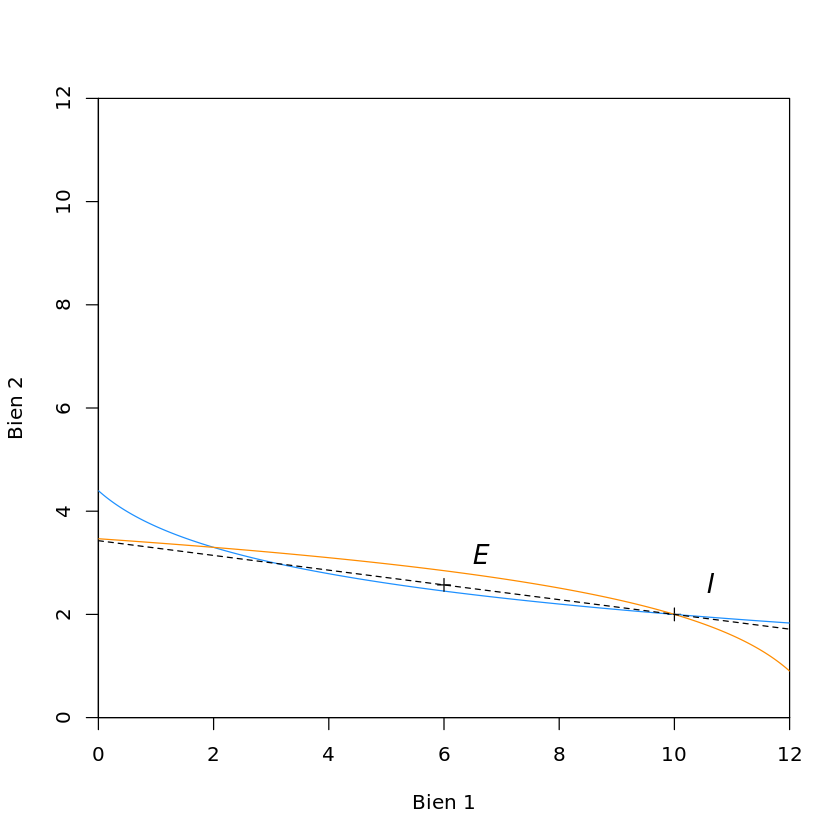

In [3]:
# Demandes (solutions internes) et prix d'équilibre

x1A <- function(p) p[2]/p[1] - 1
x2A <- function(p) (crossprod(p, omegaA) - p[1]*x1A(p))/p[2]
x1B <- function(p) p[2]/p[1] - 1
x2B <- function(p) (crossprod(p, omegaB) - p[1]*x1B(p))/p[2]
r <- 1/(1 + omega1/2)


# Allocation initiale et allocation d'équilibre

I <- omegaA
E <- c(omega1/2, r*(omegaA[1] + 1) + omegaA[2] - 1)


# Graphe

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                    # allocation initiale I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(x1, indiffA(UA(I[1], I[2], 0)), col = "dodgerblue", ylim = c(0, omega2)) # indifférence de A
lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2)) # ind. B
lines(x1, r*omegaA[1] + omegaA[2] - r*x1, lty = 2)                             # contrainte de budget à l'équilibre
points(E[1], E[2], pch=3)                                                      # équilibre concurrentiel E
    text(E[1]+.05*omega1, E[2]+.05*omega2, labels = "E", cex = 1.3, font = 3)

Maintenant, cherchons les **optima de Pareto internes**. Pour cela, on résout par exemple

\begin{equation}
    \max_{x^A, x^B} \; U^A(x^A, x_1^B) \qquad
        \text{s.c.} \; \begin{cases}
        U^B(x^B) \geq \underline U^B \\
        x_1^A + x_1^B \leq \omega_1 \\
        x_2^A + x_2^B \leq \omega_2 \\
        x_i^k > 0 \; (\forall i \in \{1, 2\}, k \in \{A, B\}).
        \end{cases}
\end{equation}

En ignorant _a priori_ les contraintes de positivité des allocations, le lagrangien associé à ce problème s'écrit

\begin{equation}
    \mathcal L (x^A, x^B, \lambda, \mu_1, \mu_2) = \ln(1 + x_1^A) + x_2^A - \frac{\ln(1 + x_1^B)}{2} + \lambda (\ln(1 + x_1^B) + x_2^B - \underline U^B) + \mu_1 (\omega_1 - x_1^A - x_1^B) + \mu_2 (\omega_2 - x_2^A - x_2^B).
\end{equation}

et les conditions du premier ordre sont

\begin{aligned}
    &\frac{1}{1 + x_1^A} - \mu_1 = 0 \\
    &1 - \mu_2 = 0 \\
    &- \frac{1}{2(1 + x_1^B)} + \lambda \frac{1}{1 + x_1^B} - \mu_1 = 0 \\
    &\lambda - \mu_2 = 0 \\
    &U^B(x^B) = \underline U^B \\
    &x_1^A + x_1^B = \omega_1 \\
    &x_2^A + x_2^B = \omega_2.
\end{aligned}

Une combinaison adéquate de ces équations fournit

\begin{equation}
    \underbrace{
        \underbrace{\frac{1}{1 + x_1^A}}_{= \mathsf{TMS}^A}
    }_\text{valeur sociale du bien 1 consommé par $A$}
    = \frac{\mu_1}{\mu_2}
    = \underbrace{
    \underbrace{- \frac{1}{2(1 + x_1^B)}}_{\text{dommage marginal}}
    + \underbrace{\frac{1}{1 + x_1^B}}_{= \mathsf{TMS}^B}
    }_\text{valeur sociale du bien 1 consommé par $B$}.
\end{equation}

À cause de l'externalité, l'égalité des TMS des agents n'est plus vérifiée à l'optimum : ce sont désormais les **valeurs sociales** des consommations (valeur privée, i.e. TMS, plus dommage ou bénéfice marginal) qui sont égales.

On résout cette équation en utilisant $x_1^B = \omega_1 - x_1^A$ et on obtient finalement

\begin{equation}
    \boxed{ x_1^A = \frac{1 + 2\omega_1}{3} } \overset{\text{A.N.}}{=} 8 + \frac{1}{3}
    \quad \text{et} \quad 
    \boxed{ x_1^B = \frac{\omega_1 - 1}{3} } \overset{\text{A.N.}}{=} 3 + \frac{2}{3}.
\end{equation}

Les allocations optimales sont donc à un niveau fixe d'allocation en bien 1, tandis que les allocations en bien 2 doivent juste vérifier $x_2^A + x_2^B = \omega_2$. Cela correspond à un segment vertical dans la boîte d'Edgeworth.

La **valeur sociale** du bien 1 à l'optimum de Pareto est alors

\begin{equation}
    \mathsf{TMS}^A \left(x_1^A = \frac{1 + 2\omega_1}{3} \right) \overset{\text{A.N.}}{=} \frac{3}{28}.
\end{equation}

Je représente la courbe des optima ci-dessous dans la boîte d'Edgeworth (en violet). Je représente aussi les optima en coin même si nous n'en avons pas discuté ci-dessus (voir TD1 exercice 2).

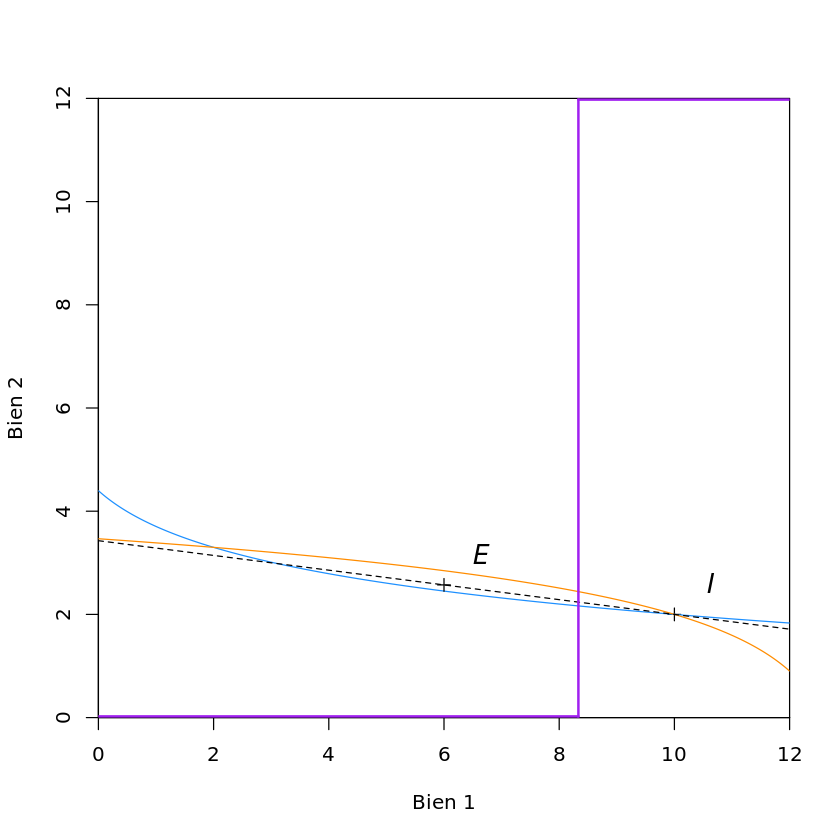

In [4]:
plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                    # allocation initiale I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(x1, indiffA(UA(I[1], I[2], 0)), col = "dodgerblue", ylim = c(0, omega2)) # indifférence de A
lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2)) # ind. B
lines(x1, r*omegaA[1] + omegaA[2] - r*x1, lty = 2)                             # contrainte de budget à l'équilibre
points(E[1], E[2], pch=3)                                                      # équilibre concurrentiel E
    text(E[1]+.05*omega1, E[2]+.05*omega2, labels = "E", cex = 1.3, font = 3)
lines(c((1+2*omega1)/3, (1+2*omega1)/3), c(0, omega2), lwd = 2, col = "purple")           # optima internes
lines(c(0, (1+2*omega1)/3), c(0, 0)+.002*omega2, lwd = 2, col = "purple")                 # optima en coin : xA2 = 0
lines(c((1+2*omega1)/3, omega1), c(omega2, omega2)-.002*omega2, lwd = 2, col = "purple")  # optima en coin : xB2 = 0

On voit bien que l'équilibre n'est pas un optimum de Pareto : **le premier théorème du bien-être n'est pas vérifié** en raison des externalités. En effet, à l'équilibre concurrentiel on doit avoir $\mathsf{TMS}^A = \mathsf{TMS}^B \,( = \frac{p_1}{p_2})$ alors qu'à l'optimum de Pareto

\begin{equation}
    \mathsf{TMS}^A = \mathsf{TMS}^B + \underbrace{\text{dommage marginal}}_{< 0} < \mathsf{TMS}^B.
\end{equation}

À l'équilibre les agents ne prennent pas en compte que la consommation en bien 1 de $B$ a un effet social néfaste : $B$ consomme donc trop de bien 1 par rapport à l'optimum.

On veut désormais utiliser le mécanisme de la **taxe pigovienne** pour faire coïncider l'équilibre avec un optimum de Pareto. L'idée est de taxer la consommation en bien 1 de $B$ afin de l'inciter à en consommer moins.

La taxe est unitaire, c'est-à-dire que $B$ devra payer un montant $t^B$ pour chaque unité de bien 1 consommée. La montant total de sa taxe sera donc $t^B x_1^B$.

Afin d'implémenter l'optimum $x_1^B = \frac{\omega_1 - 1}{3}$ et **en normalisant $p_2 = 1$**, la valeur de la taxe doit alors être 

\begin{equation}
    t^B = -\text{ dommage marginal} \left( x_1^B = \frac{\omega_1 - 1}{3} \right)
    = \frac{1}{1 + \frac{\omega_1 - 1}{3}}
    \overset{\text{A.N.}}{=} \frac{3}{28}
\end{equation}

Les prix payés par chaque agent sont alors

\begin{equation}
    p_1^A = \mathsf{TMS}^A \left( x_1^A = \frac{1 + 2\omega_1}{3} \right)
    = \frac{1}{1 + \frac{1 + 2\omega_1}{3}}
    \overset{\text{A.N.}}{=} \frac{3}{28}
\end{equation}
et 
\begin{equation}
    p_1^B = p_1^A + t^B
    \overset{\text{A.N.}}{=} \frac{6}{28}.
\end{equation}

De cette façon, à l'équilibre on a bien 

\begin{equation}
    \mathsf{TMS}^A = p_1^A = p_1^B - t^B = \mathsf{TMS}^B + \underbrace{\text{dommage marginal}}_{<0}
\end{equation}

c'est-à-dire l'égalité des valeurs sociales de la consommation en bien 1.

Représentons maintenant cela dans la boîte d'Edgeworth.

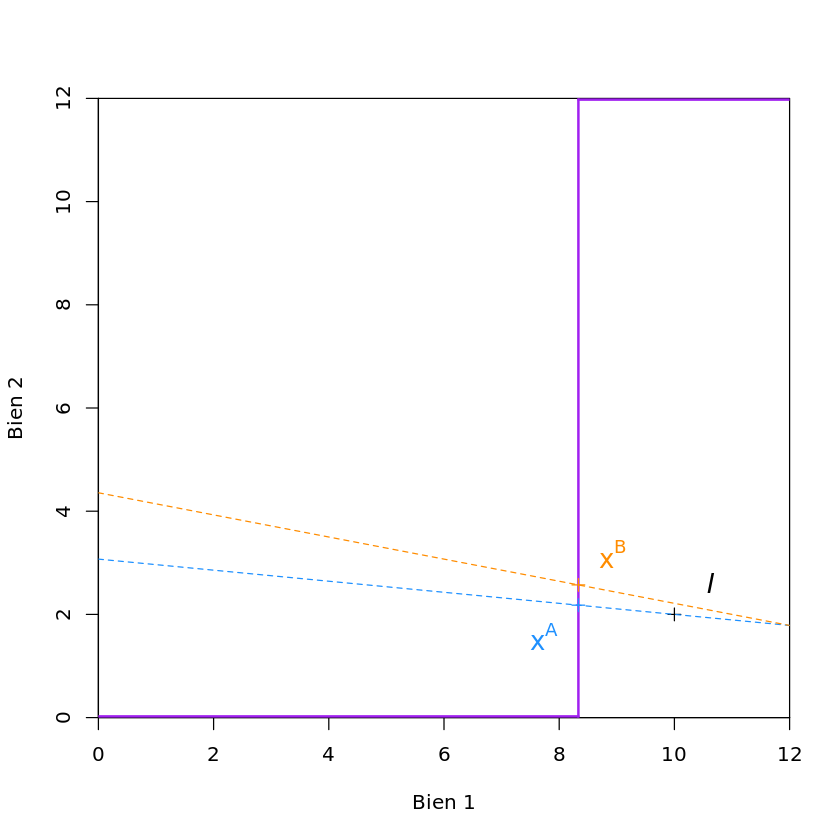

In [30]:
# Allocation optimale en bien 1 et prix d'équilibre

x1A <- (1 + 2*omega1)/3
x1B <- omega1 - x1A
p1A <- 1/(1+x1A)
tB <- 1/(2*(1+x1B))
p1B <- p1A + tB


# Boîte d'Edgeworth, allocation initiale I, courbe des optima

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                               # allocation initiale I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(c((1+2*omega1)/3, (1+2*omega1)/3), c(0, omega2), lwd = 2, col = "purple")           # optima internes
lines(c(0, (1+2*omega1)/3), c(0, 0)+.002*omega2, lwd = 2, col = "purple")                 # optima en coin : xA2 = 0
lines(c((1+2*omega1)/3, omega1), c(omega2, omega2)-.002*omega2, lwd = 2, col = "purple")  # optima en coin : xB2 = 0


# Droites de budget d'équilibre

lines(x1, p1A*omegaA[1] + omegaA[2] - p1A*x1, lty = 2, col = "dodgerblue")                # budget d'équilibre de A
lines(x1, omegaA[2] + p1B*(omega1 - x1) - p1A*omegaB[1], lty = 2, col = "darkorange")     # budget d'équilibre de B


# Allocations d'équilibre en bien 2

x2A <- p1A*(omegaA[1] - x1A) + omegaA[2]
x2B <- p1A*(omegaB[1] - x1B) + omegaB[2] - tB*x1B
xA <- c(x1A, x2A)
xB <- c(omega1 - x1B, omega2 - x2B)
points(xA[1], xA[2], pch = 3, col = "dodgerblue")                                         # allocation finale de A
    text(xA[1]-.05*omega1, xA[2]-.05*omega2, labels = parse(text='x^A'), cex = 1.3, col = "dodgerblue")
points(xB[1], xB[2], pch = 3, col = "darkorange")                                         # allocation finale de B
    text(xB[1]+.05*omega1, xB[2]+.05*omega2, labels = parse(text='x^B'), cex = 1.3, col = "darkorange")

Ci-dessus j'ai représenté la droite de budget d'équilibre de $A$ en bleu, et celle de $B$ en orange. On remarque plusieurs choses :

- La droite de budget d'équilibre de $B$ ne passe pas par l'allocation initiale $I$. C'est parce qu'à $I$ l'agent $B$ est taxé sur son bien 1, donc sa richesse post-taxe est moindre que son budget initial (i.e. son allocation initiale évaluée aux prix du marché).

- Les droites de budget d'équilibre de $A$ et $B$ se croisent à $x_1^B = 0$. C'est parce qu'à ce point $B$ ne paie pas de taxe (puisqu'il n'a pas de bien 1) donc son budget n'est pas impacté.

- L'allocation finale $(x^A, x^B)$ n'utilise pas toutes les ressources disponibles en bien 2 : $x_2^A + x_2^B < \omega_2$. C'est parce qu'une partie à été prélevée via taxation. Il faut imaginer que **les deux agents font d'abord un échange au prix en vigueur sur le marché, $p_1^A$, ce qui les amène tous les deux à l'allocation optimale $x^A$. Puis, après l'échange, la taxe prélève la richesse $t^B x_1^B$ à $B$ (en bien 2), ce qui l'amène à $x^B$** (mais $A$ qui n'est pas taxé reste à $x^A$). L'agent $B$ réalise l'échange en anticipant qu'il sera plus tard taxé sur son bien 1, et c'est cette anticipation qui l'incite à consommer moins de bien 1 qu'à l'échange concurrentiel sans taxe vu plus haut.

- Le régulateur peut ensuite redistribuer sa recette fiscale $t^B x_1^B$ dans l'économie, soit à $A$, soit à $B$, soit aux deux (e.g. la moitié à $A$ et l'autre moitié à $B$). Mais pour garantir que l'équilibre reste un optimum, **il est important que les agents n'anticipent pas cette redistribution**. Si par exemple le régulateur redistribue la taxe à $B$ mais que $B$ l'anticipe (il sait qu'il récupérera son argent à la fin), alors $B$ n'a plus d'incitation à consommer moins de bien 1 et nous serons de retour à l'équilibre concurrentiel sans taxe.

